# E-tivity 1 (23/01/23 - 05/02/23)

* Your Name: Zheng Hanming

* Your Student ID: 21225621

## Anomaly Detection

### Context
We have a mystery dataset. There are 9 explanatory variables and one response variable. The response variable is the last column and indicates if the sample is anomalous (=1, valid =0). The dataset is provided "data.csv". 

Of course in this case we could use supervised learning to generate a model and detect anomalies in new data. However the focus is on autoencoders, anomaly detection is just one of the potential uses for autoencoders.

So we are going to pretend that we do not know which data are anomalous but we do know that the anomaly rate is small. Use an autoencoder to detect anomalies in the data. The correctness of the model can of course be checked.

### Guidelines

The e-tivity is split into four tasks. The first three are "group" excersises, in that you post the solutions to Tasks 1-3 to a site. This will allow the members of your group to send you feedback (via the forums) so you can improve your submission. The final task is an individual task and together with the other tasks, should be uploaded to Sulis but not to gitlab. 

Marks will be deducted if task 4 is posted to gitlab in contravention of instructions. Also if the the final submission is not a single notebook with tasks 1-4 and with correct identification or filename.

Grading guidelines: the scores for each task are additive, max 20. Weight [5/7]

**Task 1 [0-6]**: perform and explain the steps taken in data pre-processing for this unsupervised learning model.

**Task 2 [0-4]**: correctly train model to convergence with a suitable topology and 2 encoded variables.

**Task 3 [0-4]**: select and explain choice of threshold for determining the anomalous data.

**Task 4 [0-6]**: implement a suitable VAE with correct testing and not uploaded to gitlab, in contravention of the instructions. 

## Problem

If you train even a modest feed forward network via supervised learning you can get extremely good recall and precision, despite the unbalanced dataset. However in this e-tivity you will determining the anomalies by using an autoencoder. That is you will **not** be using the Anom flag to guide the training.

The mystery dataset is available from the Sulis site, download the csv file and use it as the input data.

### Tasks 1-3 (complete by Monday 30/01/23)

These tasks are to be completed and uploaded to GitLab on which the other group members can comment. The forum activity will form part of the overall mark for the e-tivity.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np
from collections import Counter


✔ **Task 1: data preprocessing**

Explain any preprocessing steps you take and also how you have selected the training and test sets. Remember we do not know which samples are anomalous only that there are a small number of them compared to the total sample size.


Quick view of data

In [18]:
df = pd.read_csv('./data.csv')
print('Data Count:', df.size)

X = df.loc[:, df.columns != 'Anom']
y = df.loc[:, df.columns == 'Anom']

df.head()

Data Count: 490970


V1  V2  V3  V4  V5  V6  V7  V8  V9  Anom
0  50  21  77   0  28   0  27  48  22     1
1  53   0  82   0  52  -5  29  30   2     0
2  37   0  76   0  28  18  40  48   8     0
3  37   0  79   0  34 -26  43  46   2     0
4  85   0  88  -4   6   1   3  83  80     1

In [19]:
# check missing values
na_count = X.isna().sum()
print('Features with missing values')
na_count[na_count > 0]


Features with missing values


Series([], dtype: int64)

View standard statistics

In [20]:
X.describe()

V1            V2            V3            V4            V5  \
count  49097.000000  49097.000000  49097.000000  49097.000000  49097.000000   
mean      46.932399     -0.063955     85.123124      0.213231     36.871784   
std       12.875159     84.674481      8.877517     37.579171     19.963113   
min       27.000000  -4821.000000     21.000000  -3939.000000   -188.000000   
25%       37.000000      0.000000     79.000000      0.000000     30.000000   
50%       44.000000      0.000000     83.000000      0.000000     42.000000   
75%       50.000000      0.000000     88.000000      0.000000     46.000000   
max      126.000000   5075.000000    149.000000   3830.000000    436.000000   

                 V6            V7            V8            V9  
count  49097.000000  49097.000000  49097.000000  49097.000000  
mean       2.160030     38.200725     48.288592     10.261930  
std      218.324964     13.446306     20.572064     23.751024  
min   -26739.000000    -48.000000   -353.000000   -356.000000  
25%       -4.000000     33.000000     35.000000      0.000000  
50%        0.000000     39.000000     41.000000      2.000000  
75%        5.000000     43.000000     55.000000      6.000000  
max    15164.000000    105.000000    270.000000    266.000000

Plot correlation matrix<br/>
- V1 => -ve: V7 | +ve: V3, V8, V9
- V2 => no obvious correlation
- V3 => -ve: None | +ve: V5, V7, V8
- V4 => no obvious correlation
- V5 => -ve: V8, V9 | +ve: V3
- V6 => no obvious correlation
- V7 => -ve: V1, V9 | +ve: V3
- V8 => -ve: V5 | +ve: V3, V9
- V9 => -ve: V5, V7 | +ve: V1, V8

<AxesSubplot:>

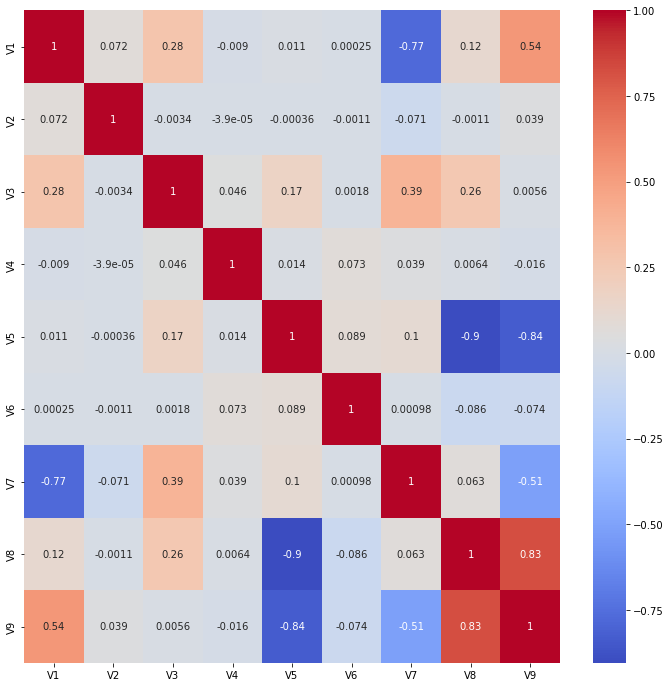

In [21]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')


Split training and test data<br/>
- y_train will not be used in training because it is assumed to be unknown.


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print('Anomalies In Training Set:', y_train[y_train.Anom == 1].size / y_train.size)
print('Anomalies In Testing Set:', y_test[y_test.Anom == 1].size / y_test.size)

# X_train_normal will not be used for training, but only for exploring data
X_train_normal = X_train.loc[y_train.Anom.isin([0])]


Anomalies In Training Set: 0.0716195228759834
Anomalies In Testing Set: 0.07107942973523422


Check for outliers<br>
Here to can observe the outliers in:
- x_train_normal: 1st row
- x_train: 2nd row

We can observe that there are significant difference between the two data sets for feature V1, V2. Therefore, there is a high chance that these two features will play an important role in our anomaly detection.<br>
Note: This information is not available in training as we are assumed to not have access to Anom column. However, it is interesting to see what might be causing the anomaly.

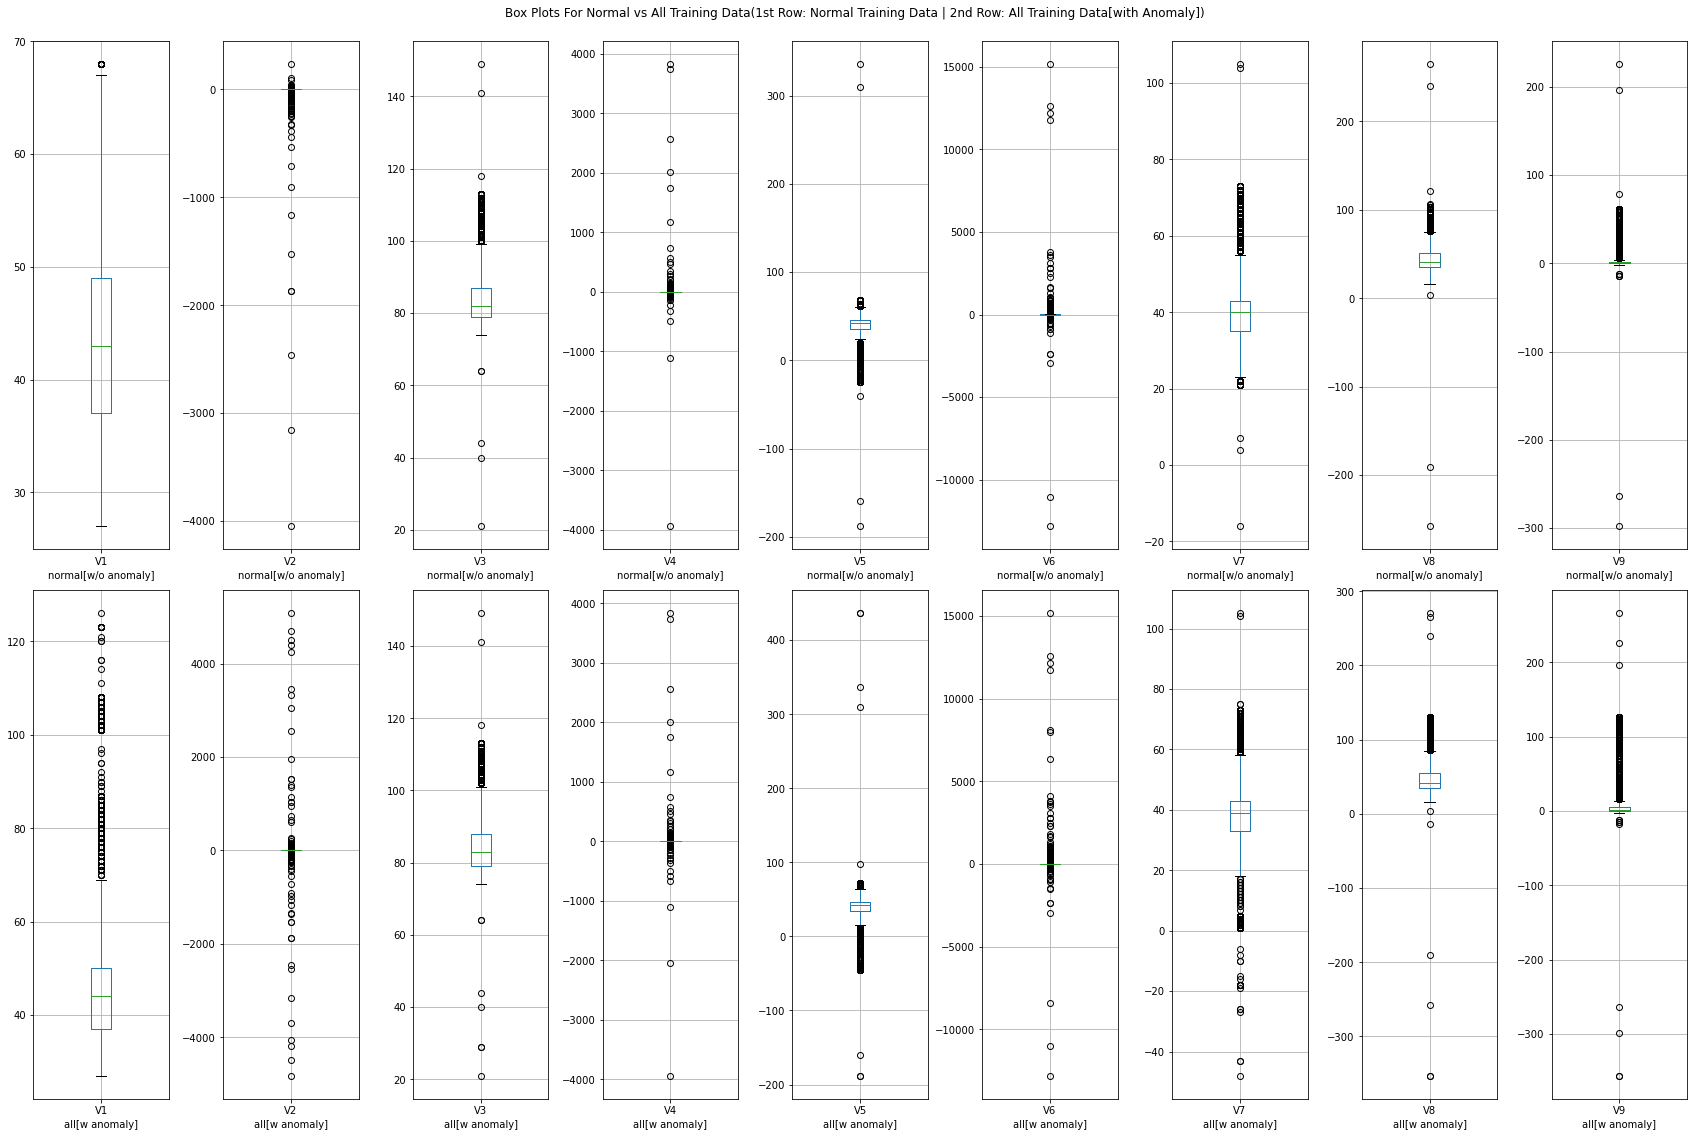

In [23]:
fig, axs = plt.subplots(2, 9, figsize=(24, 16))
fig.suptitle('Box Plots For Normal vs All Training Data(1st Row: Normal Training Data | 2nd Row: All Training Data[with Anomaly])')
fig.tight_layout(pad=(2))
for i, col in enumerate(X.columns):
    axs[0][i].set_xlabel('normal[w/o anomaly]')
    X_train_normal.boxplot(column=col, ax=axs[0][i])
    axs[1][i].set_xlabel('all[w anomaly]')
    X_train.boxplot(column=col, ax=axs[1][i])


Sacle features<br>
Features are not in the same scale and we have to scale them<br>
- fit transform on the x_train to scale our training features
- transform on x_test to scale our test features based on the same scale from training features

In [24]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Task 2: model generation and training**

Generate a suitable autoencoder model, the only restriction is that there should be only 2 latent variables. Train the model to a satistifactory result. Be aware that it will be much harder to achieve the sort of result you can get from a supervised learning model. 

**Hint**: it should not take longer than a 1000 epochs to train. However it may be difficult to train. Use different optimizers, topologies and/or weight initialisations to get convergence. Remember that achieving a perfect error means that the model will also be good at reconstructing anomalies. 


In [25]:
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Model Creation<br>
- A model consists of 3 layers and each of these performs different tasks
  - input layer: This is used to instantiate a keras tensor, most important arg is the shape of the input.
  - encoder layer: This performs the work to "compress" the features into a smaller dimension. There can be multiple layers in it and they usually work their way from higher to lower dimensions.
  - decoder layer: This is to "decompress" the features into a bigger dimension. There can be multiple layers and they usually work their way from lower to higher dimensions.
- A model has to be compiled before training
  - optimizer chosen: adam
  - loss function: mean absolute error

In [26]:
feature_count = len(X.columns)
latent_dim = 2
intermediate_dim = 6
max_epoch = 500
anom_rate = 7

inputs = tf.keras.layers.Input(shape=(feature_count,), name='inputs')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=50, mode="min")

def measure_performance(X_pred, X_test, y_test, tolerance = 7):
    # calculate reconstruction threshold
    reconstruction_error = tf.keras.losses.mae(X_pred, X_test)
    loss_threshold = np.percentile(reconstruction_error, (100 - tolerance))
    print(f'Threshold for {tolerance}% of anomaly: {loss_threshold:.4f}')

    # plot the reconstruction error and threshold with anomaly rate
    sns.histplot(reconstruction_error, bins=30, alpha=0.8)
    plt.axvline(x=loss_threshold, color='red')
    plt.show()

    y_pred = [0 if err < loss_threshold else 1 for err in reconstruction_error]
    # check classification results
    print('Classification Report')
    print(classification_report(y_test, y_pred))
    # confusion matrix
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))

In [27]:
encoder = tf.keras.Sequential([
      tf.keras.layers.Dense(intermediate_dim, activation='relu'),
      tf.keras.layers.Dense(latent_dim, activation='relu')], name='encoder')(inputs)

decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(intermediate_dim, activation="relu"),
      tf.keras.layers.Dense(feature_count, activation="sigmoid")], name='decoder')(encoder)

autoencoder = tf.keras.Model(inputs=inputs, outputs=decoder, name='AE')


Model Training<br>
Training of the model takes a few parameters:
- x & y: this is a unsupervised learning model so both x & y will take in the training data without anomaly
- epochs: the number of iterations which the model will be trained subject to any early stoping algorithm
- batch_size: number of samples for each gradient update
- validation_data: we use X_test because this is the data set with anomalous data
- callbacks: there is not a need to run the full epochs(e.g. 1000) and we have a early stopping function to stop the training when the validation error stops to decrease for X turns

In [28]:
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(X_train, X_train,
                epochs=max_epoch,
                batch_size=64,
                shuffle=True,
                callbacks=[early_stopping])


Epoch 1/500
614/614 [==============================] - 1s 1ms/step - loss: 0.0323
Epoch 2/500
614/614 [==============================] - 1s 1ms/step - loss: 0.0163
Epoch 3/500
614/614 [==============================] - 1s 1ms/step - loss: 0.0156
Epoch 4/500
614/614 [==============================] - 1s 1ms/step - loss: 0.0152
Epoch 5/500
614/614 [==============================] - 1s 1ms/step - loss: 0.0145
Epoch 6/500
614/614 [==============================] - 1s 1ms/step - loss: 0.0129
Epoch 7/500
614/614 [==============================] - 1s 1ms/step - loss: 0.0084
Epoch 8/500
614/614 [==============================] - 1s 2ms/step - loss: 0.0068
Epoch 9/500
614/614 [==============================] - 1s 2ms/step - loss: 0.0067
Epoch 10/500
614/614 [==============================] - 1s 2ms/step - loss: 0.0067
Epoch 11/500
614/614 [==============================] - 1s 2ms/step - loss: 0.0067
Epoch 12/500
614/614 [==============================] - 1s 1ms/step - loss: 0.0067
Epoch 13/500


**Task 3: anomaly detection**

From the histogram of the reconstruction error decide what the cutoff should be applied to distinguish anomalies from valid samples, given that the anomaly rate is ~7%.

Threshold Calculation<br>
We know the anomaly rate is 7% and we assume that there is 7% anomalous data in test data set. Therefore, we set our threshold at 93 percentile.

307/307 [==============================] - 0s 1ms/step
Threshold for 7% of anomaly: 0.0026


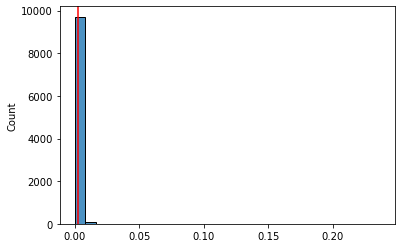

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      9122
           1       0.47      0.47      0.47       698

    accuracy                           0.93      9820
   macro avg       0.72      0.71      0.71      9820
weighted avg       0.92      0.93      0.92      9820

Confusion Matrix
[[8759  363]
 [ 373  325]]


In [29]:
X_pred = autoencoder.predict(X_test)
measure_performance(X_pred, X_test, y_test)

### Post (complete by Monday 30/01/23)

Post your solution to Tasks 1-3 in notebook form. If you have not completed all the tasks then that is acceptable. The purpose is to get feedback from others in the group, so if you have only a basic outline then you may get ideas about how to proceed and also examples from others in your group.

No posts should refer to Task 4.

### Respond (complete by Wednesday 01/02/23)

If you feel you can provide useful advise then respond to another member of the group through the appropriate forum. Responses should be respectful and offer some sort of advise. Try and avoid clogging the forums with support or thank you messages.

In reviewing others code you will discover different ways to tackle the same problem. It is acceptable to copy parts of others code. However whole scale copying from another notebook is not acceptable.

Grading guidelines for the forum posts: Weight [2/7]

**Beginning [0-8]:** Respectful posts of minor value. Significant number of posts without valuable contributions and/or without well-considered questions. Posts about task 4 in contravention of intructions.

**Developing [9-12]:** At least 1 post  exceeding Beginning level with respectful suggestion or thought provoking question. Most posts contain valuable contributions or well-considered questions.

**Advancing [13-16]:** At least 2 posts: 1 equal to or exceeding Beginning level;  1 with respectful and sound contribution highlighting mistakes or alternative approaches.

**Accomplished [17-20]:** At least 3 posts: 2 equal to or exceeding Accomplished level; 1 with respectful contribution of significant value. 

### Task 4: VAE (completed by Sunday 05/02/23)

This task is a individual task and should **not** to be uploaded to GitHub. No direct support should be given via the forums, although comments about progress or results are allowed. Marks will be deducted if the instructions are not followed (see rubrics). This part should be uploaded directly to Sulis.

Change the network to be a VAE. Again determine the optimal cutoff and plot the latent variables. Check how good the cutoffs were by constructing a confusion matrix or generating a classification report. Obviously for this task you need to use the Anom column.

**Hint** you can use the model topology from the AE (with the obvious modifications). I found that I had a good model (almost as good and the supervised learning model) when the KL divergence was small. You can print out both the KL divergence and reconstruction loss for each epoch. It can be tricky to train these type of models, so do not be surprised if you do not get a stellar result. What is more important is that you have the correct code to implement the VAE.

### Final Submission (complete by Sunday 05/02/23)

Submit Tasks 1-4 in a single notebook this before the deadline on Sunday.


Model Creation<br>
The below code is learnt from https://keras.io/examples/generative/vae/<br>
There are 2 main difference between AE and VAE:
- encoder: Instead of deriving at one latent vector, we now add a layer which represents mean + std deviation * epsilon
- loss function: Loss function is also adjust to inlcude KL Loss

In [30]:
class Sampling(tf.keras.layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# encoder
intermediate = tf.keras.layers.Dense(intermediate_dim, activation="relu", name='intermediate')(inputs)
z_mean = tf.keras.layers.Dense(latent_dim, name="z_mean")(intermediate)
z_log_var = tf.keras.layers.Dense(latent_dim, name="z_log_var")(intermediate)
z = Sampling()([z_mean, z_log_var])
encoder = tf.keras.Model(inputs, [z_mean, z_log_var, z], name="encoder")

# decoder
latent_inputs = tf.keras.Input(shape=(latent_dim,), name='encoder_output')
intermediate = tf.keras.layers.Dense(intermediate_dim, activation="relu", name='intermediate')(latent_inputs)
decoder_outputs = tf.keras.layers.Dense(feature_count, activation="sigmoid")(intermediate)
decoder = tf.keras.Model(latent_inputs, decoder_outputs, name="decoder")

# model: use class implementation because we need to define custom train step to calculate the loss function
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(tf.keras.losses.binary_crossentropy(data, reconstruction))
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

Model Training

In [31]:
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam')
vae.fit(X_train, epochs=max_epoch, batch_size=64,
        shuffle=True, callbacks=[early_stopping])


Epoch 1/500
614/614 [==============================] - 2s 2ms/step - loss: 44.1675 - reconstruction_loss: 43.1595 - kl_loss: 0.0595
Epoch 2/500
614/614 [==============================] - 1s 2ms/step - loss: 42.3160 - reconstruction_loss: 42.2515 - kl_loss: 0.0095
Epoch 3/500
614/614 [==============================] - 1s 2ms/step - loss: 42.2474 - reconstruction_loss: 42.2149 - kl_loss: 0.0031
Epoch 4/500
614/614 [==============================] - 2s 3ms/step - loss: 42.2323 - reconstruction_loss: 42.2104 - kl_loss: 0.0021
Epoch 5/500
614/614 [==============================] - 2s 3ms/step - loss: 42.2295 - reconstruction_loss: 42.2104 - kl_loss: 0.0014
Epoch 6/500
614/614 [==============================] - 1s 2ms/step - loss: 42.2253 - reconstruction_loss: 42.2098 - kl_loss: 8.5465e-04
Epoch 7/500
614/614 [==============================] - 1s 2ms/step - loss: 42.2245 - reconstruction_loss: 42.2099 - kl_loss: 4.6118e-04
Epoch 8/500
614/614 [==============================] - 1s 2ms/step -

Anomaly Detection

307/307 [==============================] - 0s 1ms/step
Threshold for 7% of anomaly: 0.0620


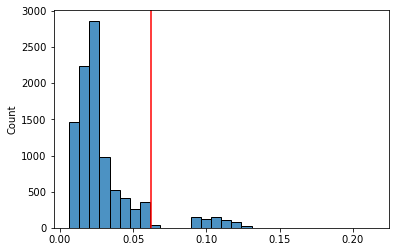

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9122
           1       0.96      0.95      0.95       698

    accuracy                           0.99      9820
   macro avg       0.98      0.97      0.98      9820
weighted avg       0.99      0.99      0.99      9820

Confusion Matrix
[[9095   27]
 [  37  661]]


In [32]:
z, _, _ = vae.encoder.predict(X_test)
X_pred = vae.decoder.predict(z)
measure_performance(X_pred, X_test, y_test)

## Reflection

There are no specific marks allocated for a reflection. However due consideration will be given if pertinent comments or valuable insights are made.